## Stores Sales Prediction
`Prasad Jadhav`

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 8523
Number of Columns: 12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
df.cov()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,21.561688,-0.003172,7.865693,-0.354551,1.005608e+02
Item_Visibility,-0.003172,0.002662,-0.004225,-0.032325,-1.132561e+01
Item_MRP,7.865693,-0.004225,3878.183909,2.617143,6.031749e+04
Outlet_Establishment_Year,-0.354551,-0.032325,2.617143,70.086372,-7.019621e+02
Item_Outlet_Sales,100.560811,-11.325611,60317.485612,-701.962133,2.912141e+06


In [12]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
# Item_Identifier
# Item_Fat_Content
# Item_Type
# Outlet_Identifier
# Outlet_Size
# Outlet_Location_Type
# Outlet_Type

In [15]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
num_features = df.select_dtypes(include = ['int64', 'float64']).dtypes.index

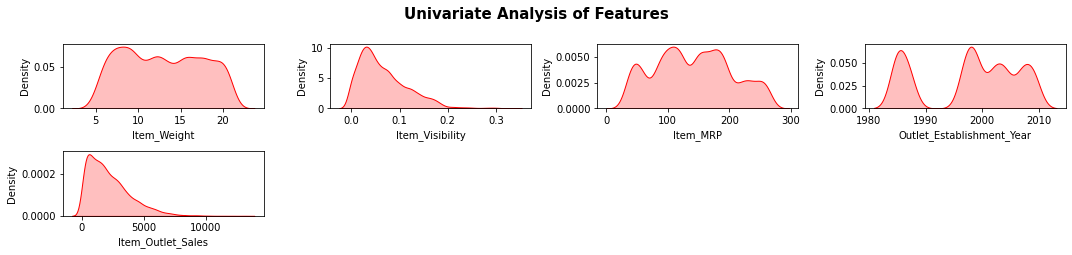

In [24]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df[num_features[i]],shade=True,color='red')
    plt.tight_layout()

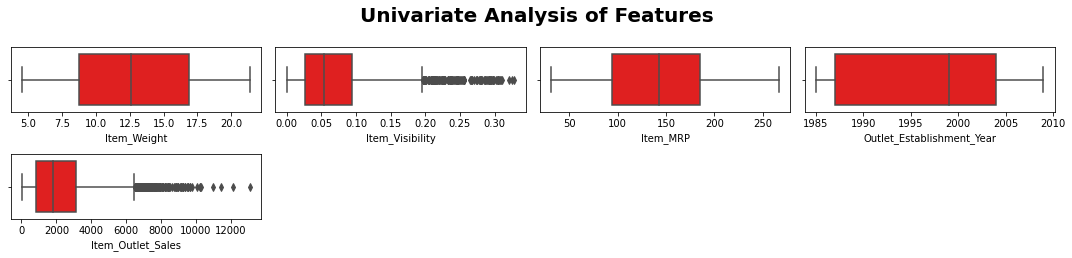

In [25]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=20,y=1)

for i in range(0,len(num_features)):
    plt.subplot(10,4,i+1)
    sns.boxplot(data=df,x=num_features[i],color='red')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [26]:
cat_features = df.select_dtypes(include='object').dtypes.index

In [27]:
# plt.figure(figsize=(15,15))
# plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

# for i in range(0,len(cat_features)):
#     plt.subplot(10,4,i+1)
#     sns.countplot(x=df[cat_features[i]],color='red')
#     plt.tight_layout()

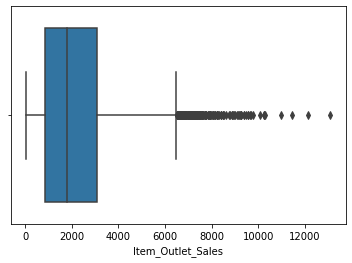

In [28]:
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()

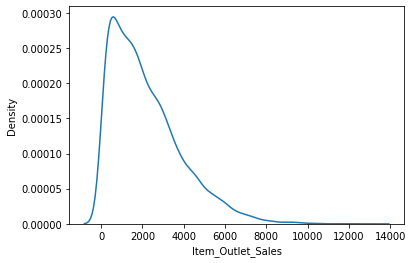

In [29]:
sns.kdeplot(df['Item_Outlet_Sales'])
plt.show()

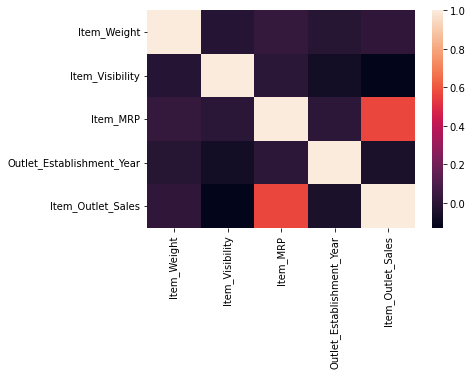

In [30]:
sns.heatmap(df.corr())
plt.show()

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

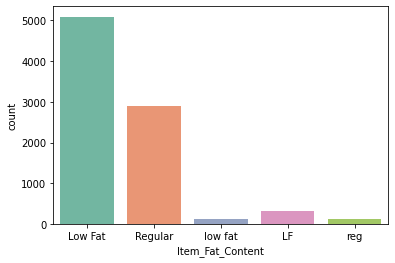

In [32]:
sns.countplot(df['Item_Fat_Content'], palette='Set2')
plt.show()

`In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.`

In [33]:
df['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'}, inplace=True)

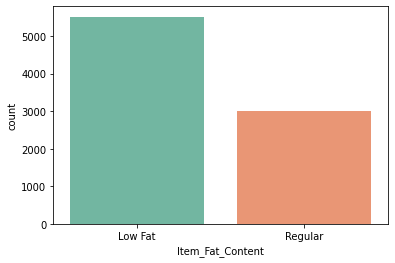

In [34]:
sns.countplot(df['Item_Fat_Content'], palette='Set2')
plt.show()

In [35]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

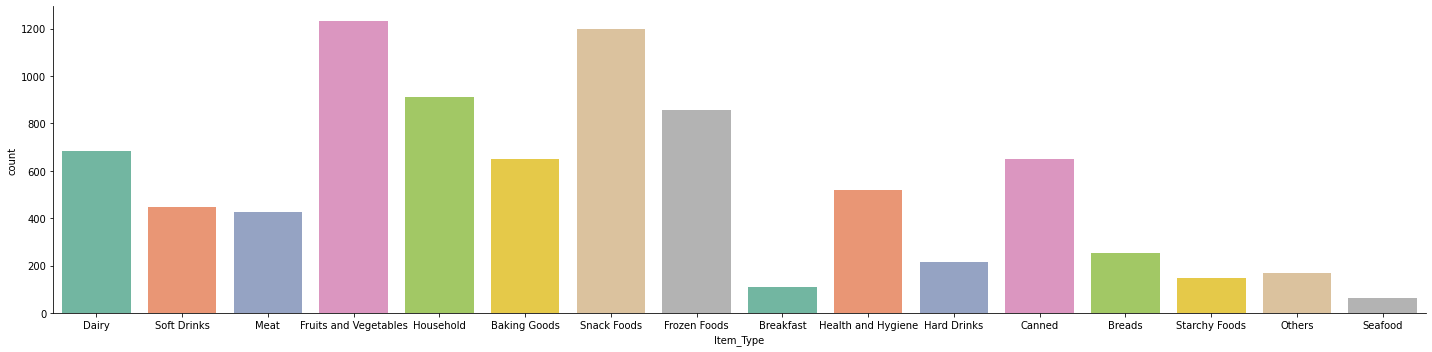

In [36]:
sns.catplot('Item_Type', kind='count', data=df, aspect=4, palette='Set2')
plt.show()

In [37]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

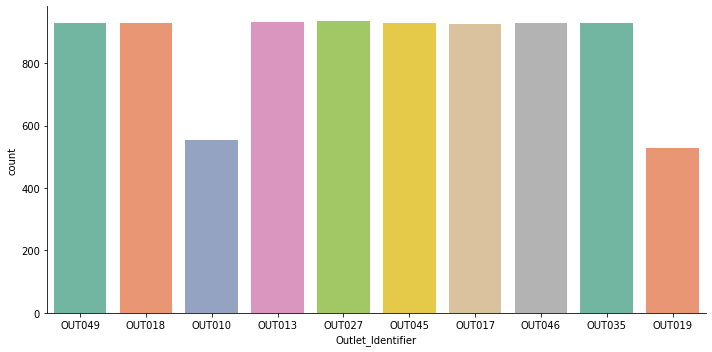

In [38]:
sns.catplot('Outlet_Identifier', kind='count', data=df, aspect=2, palette='Set2')
plt.show()

In [39]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

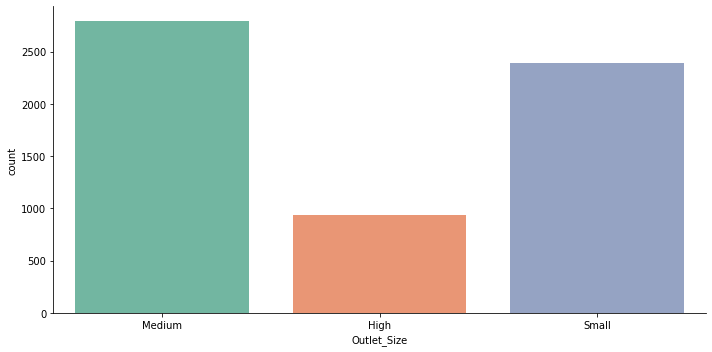

In [40]:
sns.catplot('Outlet_Size', kind='count', data=df, aspect=2, palette='Set2')
plt.show()

In [41]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

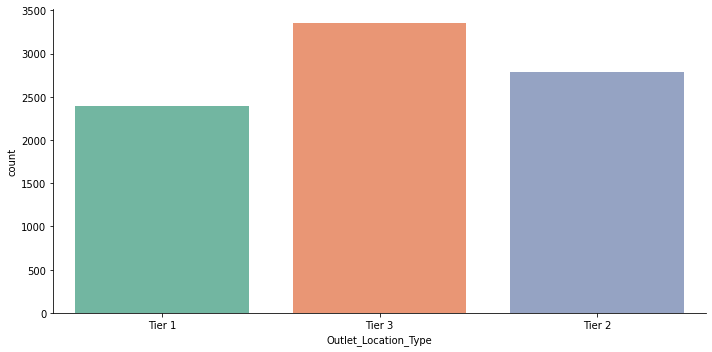

In [42]:
sns.catplot('Outlet_Location_Type', kind='count', data=df, aspect=2, palette='Set2')
plt.show()

In [43]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

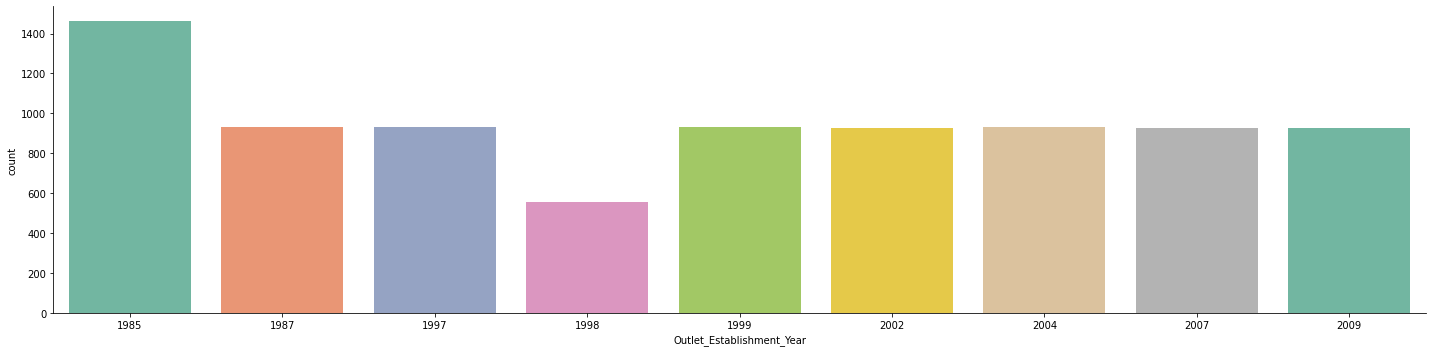

In [44]:
sns.catplot('Outlet_Establishment_Year', kind='count', data=df, aspect=4, palette='Set2')
plt.show()

In [45]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

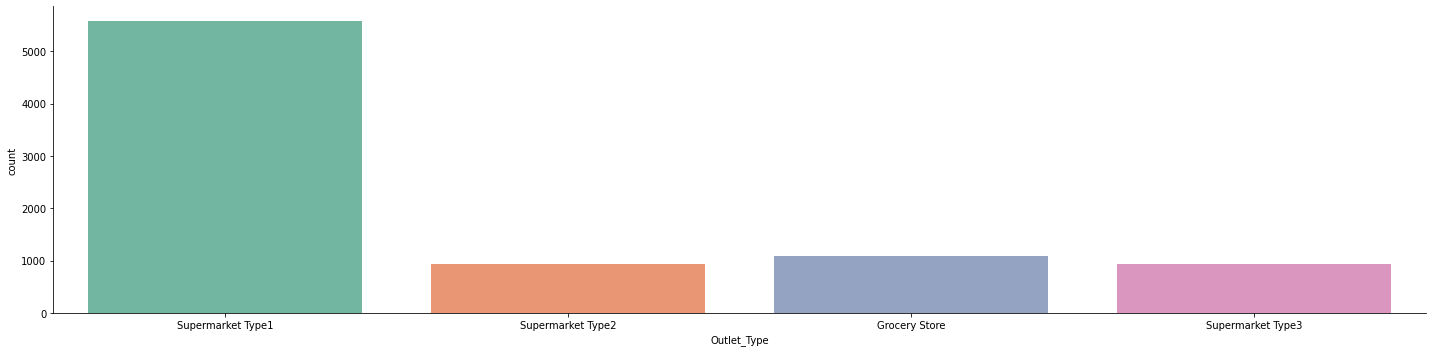

In [46]:
sns.catplot('Outlet_Type', kind='count', data=df, aspect=4, palette='Set2')
plt.show()

`Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years. Supermarket Type 1 seems to be the most popular category of Outlet_Type.`

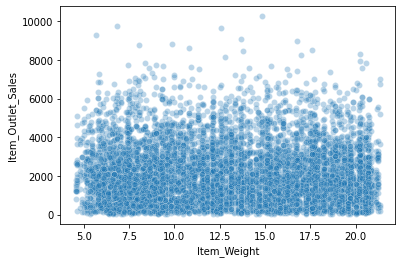

In [47]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha = 0.3)
plt.show()

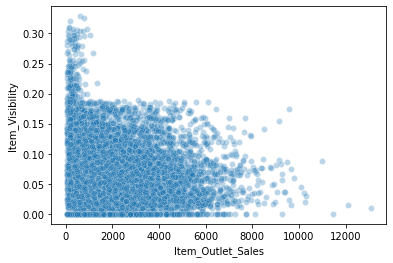

In [48]:
sns.scatterplot(x='Item_Outlet_Sales', y='Item_Visibility', data=df, alpha = 0.3)
plt.show()

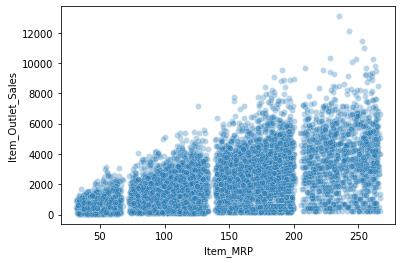

In [49]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha = 0.3)
plt.show()

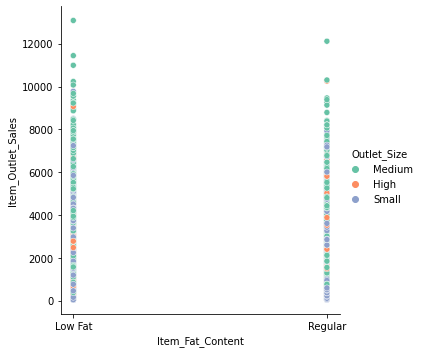

In [50]:
sns.relplot(x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Outlet_Size', data=df, kind='scatter', palette='Set2')
plt.show()

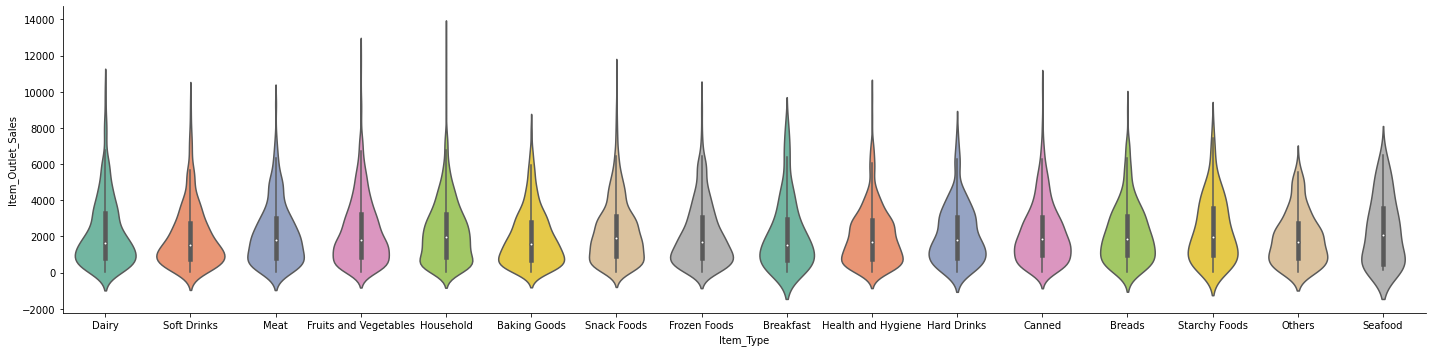

In [51]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales', kind='violin', data=df, aspect=4, palette='Set2')
plt.show()

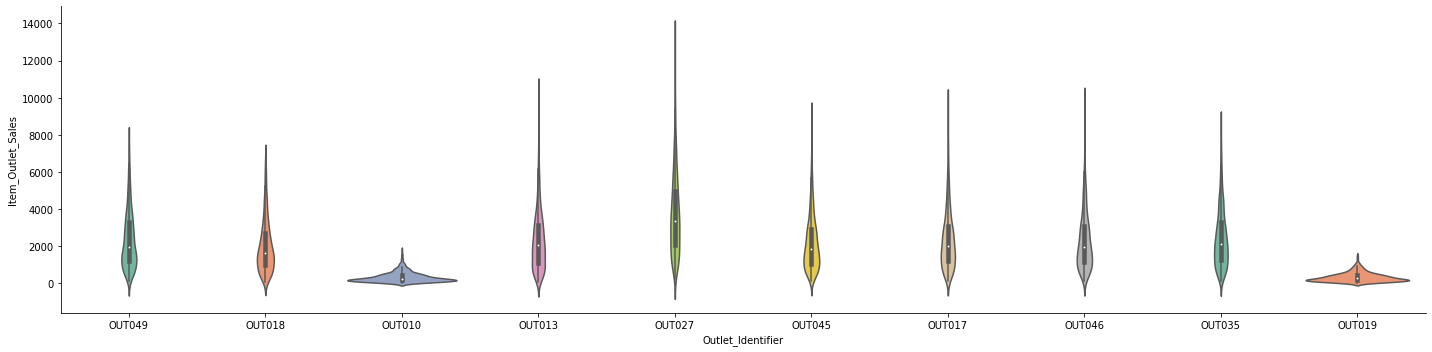

In [52]:
sns.catplot('Outlet_Identifier', 'Item_Outlet_Sales', kind='violin', data=df, aspect=4, palette='Set2')
plt.show()

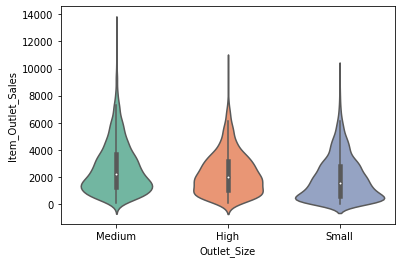

In [53]:
sns.violinplot('Outlet_Size', 'Item_Outlet_Sales', data=df, palette='Set2')
plt.show()

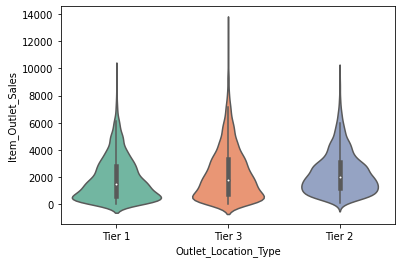

In [54]:
sns.violinplot('Outlet_Location_Type', 'Item_Outlet_Sales', data=df, palette='Set2')
plt.show()

In [55]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [56]:
df['Outlet_Size'].fillna('Small', inplace=True)

In [57]:
encoder = LabelEncoder()

In [58]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [60]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.09277036662431215
MAE 1220.3797696187685


In [63]:
dt = DecisionTreeRegressor()

param = {
    'max_depth':[6,9,12,15],
    'min_samples_leaf':[10,50,100,150]
}

random_search = RandomizedSearchCV(dt,param_distributions=param,
                                 n_iter=5,scoring=make_scorer(mean_squared_error),
                                 n_jobs=-1,cv=5,verbose=3)

dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

random_search.fit(X,y)

means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
1204412.582740 with: {'min_samples_leaf': 150, 'max_depth': 6}
1192183.036248 with: {'min_samples_leaf': 10, 'max_depth': 6}
1187950.755694 with: {'min_samples_leaf': 50, 'max_depth': 6}
Best parameters with the minimum Mean Square Error are: {'min_samples_leaf': 50, 'max_depth': 6}
1201042.377021 with: {'min_samples_leaf': 100, 'max_depth': 12}
1472851.747103 with: {'min_samples_leaf': 10, 'max_depth': 15}
R2_Score 0.5584731903190951
MAE 808.7489438651747


In [64]:
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.5713229612125472
MAE 804.4481910538289


In [65]:
gb = GradientBoostingRegressor(n_estimators=500)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.5695763743369545
MAE 812.0084291981547


In [66]:
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.5521754757696204
MAE 834.0679425953945


In [67]:
ls = Lasso(alpha=0.01)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.48912515828072733
MAE 944.877688718089


In [69]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

xgb1 = XGBRegressor()

random_search1 = RandomizedSearchCV(xgb1,param_distributions=params,
                                 n_iter=5,scoring='neg_mean_squared_error',
                                 n_jobs=-1,cv=5,verbose=3)

random_search1.fit(X,y)

means = random_search1.cv_results_['mean_test_score']
params = random_search1.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
-1202777.005230 with: {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.5}
-1280324.024535 with: {'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
-1474030.263910 with: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.5}
Best parameters with the minimum Mean Square Error are: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.5}
-1232604.891889 with: {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.7}
-1329060.123884 with: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [76]:
xgb2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=15,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgb2.fit(X,y)
y_pred = xgb2.predict(X)

score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

#Perform cross-validation:
cv_score = cross_val_score(xgb2,X, y, cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

Score of Training: 99.9989012755329
MAE : 1.84
RMSE : 5.656

Model Report
RMSE : 5.656
CV Score : Mean - 1264 | Std - 55.24 | Min - 1165 | Max - 1376


In [79]:
y_pred = xgb2.predict(X_train)
score = r2_score(y_train,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))

Score of Training: 99.99890881737646
RMSE : 5.593


In [80]:
cv_score = cross_val_score(xgb2,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
RMSE : 5.593
CV Score : Mean - 1259 | Std - 74.36 | Min - 1119 | Max - 1442


In [81]:
y_test_pred = xgb2.predict(X_test)
score = r2_score(y_test,y_test_pred)
print("Score of Testing:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,y_test_pred)))
cv_score = cross_val_score(xgb2,X_test, y_test, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

Score of Testing: 99.99887193032619
RMSE : 5.901

Model Report
RMSE : 5.901
CV Score : Mean - 1320 | Std - 137.4 | Min - 1099 | Max - 1607


In [82]:
import pickle

In [83]:
pickle.dump(xgb2,open('store_price_predictor.pkl','wb'))

In [84]:
model = pickle.load(open('store_price_predictor.pkl','rb'))

In [93]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [94]:
test_data1 = [[156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1]]

In [85]:
test_data = [[627,11.800000,1,0.057422,10,149.9366,8,1997,2,0,1]]

In [86]:
columns = [
    'Item_Identifier',
    'Item_Weight',
    'Item_Fat_Content',
    'Item_Visibility',
    'Item_Type',
    'Item_MRP',
    'Outlet_Identifier',
    'Outlet_Establishment_Year',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
]


df_test = pd.DataFrame(test_data, columns=columns)

print(df_test)

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              627         11.8                 1         0.057422         10   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  149.9366                  8                       1997            2   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  


In [95]:
columns = [
    'Item_Identifier',
    'Item_Weight',
    'Item_Fat_Content',
    'Item_Visibility',
    'Item_Type',
    'Item_MRP',
    'Outlet_Identifier',
    'Outlet_Establishment_Year',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
]


df_test1 = pd.DataFrame(test_data1, columns=columns)

print(df_test)

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              627         11.8                 1         0.057422         10   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  149.9366                  8                       1997            2   

   Outlet_Location_Type  Outlet_Type  
0                     0            1  


In [87]:
model.predict(df_test)[0]

1664.4481

In [96]:
model.predict(df_test1)[0]

3734.6067

In [97]:
# Note by PRASAD JADHAV
## Thank You!

In [1]:
# model.save_model('store_price_predictor.bin')